# OpenAltimetry ICESat-2: Photon ATL03


### Overview
<blockquote>This notebook demonstrates how to pull low level global geolocated photon data (ATL03) from the ICESat-2 mission via the OpenAltimetry API (https://openaltimetry.org/data/swagger-ui/).</blockquote>



### Instructions
<blockquote>Replace the "OA_API_URL" string with the data copied from : "Get API request" from the OpenAltimetry elevation chart and start visualizing your data!</blockquote>

Author: Luis Lopez - luis.lopez@nsidc.org; updated: Minh Phan - mnphan@ucsd.edu

In [28]:
import pandas as pd
import json
import requests

# Paste the OpenAltimetry API URL for Photon here: 
OA_API_URL = 'http://openaltimetry.org/data/api/icesat2/atl03?date=2021-11-13&minx=88.28737766829597&miny=21.49203679167097&maxx=90.08089573470222&maxy=22.57144352995222&trackId=797&beamName=gt3r&beamName=gt3l&beamName=gt2r&beamName=gt2l&beamName=gt1r&beamName=gt1l&outputFormat=json'

# Select the list of confidence to display: 'Noise', 'Buffer', 'Low', 'Medium', 'High'
# OA_PHOTON_CONFIDENCE = ['Noise', 'Buffer', 'Low', 'Medium', 'High']
OA_PHOTON_CONFIDENCE = ['Medium', 'High']

df_beams = []
oa_plots = []

# This function will request the 6 beams data using OpenAltimetry's API
def getPhotonData():
    series = []
    b_url = OA_API_URL + '&client=jupyter'
    print('Requesting data from OA')
    r = requests.get(b_url)
    data = r.json()
    return data

        
photon_cloud = getPhotonData()

for beam in photon_cloud:
    
    print('Reading data for beam: ' + beam['beam_name'])

    for photons in beam['series']:
        if any(word in photons['name'] for word in OA_PHOTON_CONFIDENCE):
            series = []
            for p in photons['data']:
                series.append({
                    'lat': p[0],
                    'lon': p[1],
                    'h': p[2]
                })
            if (len(series) > 0):
                df = pd.DataFrame.from_dict(series)
                df.name = beam['beam_name'] + ' ' + photons['name']
                df_beams.append(df)

# for df in df_beams:
#     oa_plots.append(go.Scatter3d(name=df.name, x=df['lat'], y=df['lon'], z=df['h'], mode='markers',
#                                     marker=dict(
#                                         size=1,
#                                         color=df['h'],
#                                         colorscale='Viridis',   # choose a colorscale
#                                         opacity=0.8
#                                     )
#                                 )
#                    )
    
# layout = go.Layout(
#     width=900,
#     height=600,
#     scene = dict(aspectmode = 'manual', aspectratio =dict(x=1, y=1, z=0.5),
#                  xaxis=dict(title='Latitude'), yaxis=dict(title='Longitude'), zaxis=dict(title='Elevation (m)'))
# )

df_beams[0]

Requesting data from OA
Reading data for beam: gt3r
Reading data for beam: gt3l
Reading data for beam: gt2r
Reading data for beam: gt2l
Reading data for beam: gt1r
Reading data for beam: gt1l


,lat,lon,h
0,22.067795,89.317941,-50.036870
1,22.065006,89.317651,-57.429565
2,22.063261,89.317476,-69.025810
3,22.055303,89.316654,-47.600300
4,22.043566,89.315439,-47.487910
5,22.043177,89.315398,-47.880054
6,21.787106,89.288398,-60.958664
7,21.773671,89.286990,-59.638770
8,21.768274,89.286420,-57.121586
9,21.766694,89.286252,-56.671143


In [29]:
TRACKS_URL = 'https://openaltimetry.org/data/api/icesat2/getTracks?date=2020-05-13&minx=-10&miny=-10&maxx=10&maxy=10&outputFormat=json'
tracks_response = requests.get(TRACKS_URL)
# pd.read_json(tracks_response.json())
tracks_response.json()

{'input': {'date': '2020-05-13',
  'extent': {'minlon': -10.0,
   'maxlon': 10.0,
   'minlat': -10.0,
   'maxlat': 10.0}},
 'output': {'total': 3, 'track': [732, 733, 740]}}

<AxesSubplot:xlabel='lon', ylabel='h'>

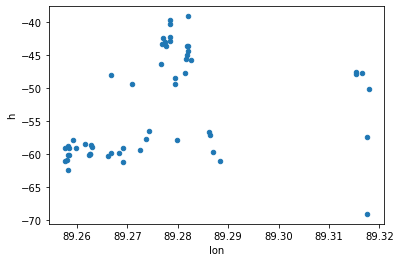

In [30]:
testdata = df_beams[0]
testdata.plot(kind='scatter',x='lon',y='h')

              lat         lon           h
count  116.000000  116.000000  116.000000
mean    21.663211   89.275383  -45.597129
std      0.129871    0.013698   39.185809
min     21.493244   89.257431 -119.136900
25%     21.583550   89.266887  -83.499450
50%     21.661971   89.275342  -32.136505
75%     21.705649   89.279863  -12.883989
max     22.531591   89.367047   14.601927
             lat        lon          h
count   6.000000   6.000000   6.000000
mean   21.609518  89.269705 -55.605822
std     0.081219   0.008564  12.912679
min    21.502702  89.258436 -69.503525
25%    21.554222  89.263861 -66.307684
50%    21.618465  89.270626 -55.272819
75%    21.646993  89.273733 -44.062876
max    21.728165  89.282168 -43.273570
             lat        lon          h
count  42.000000  42.000000  42.000000
mean   21.628520  89.271725 -53.820394
std     0.083419   0.008804   8.756540
min    21.496037  89.257727 -80.105970
25%    21.540902  89.262480 -60.523954
50%    21.638441  89.272805 -53.17276

C:\Users\maxli\anaconda3\envs\thesis_env\lib\site-packages\pandas\plotting\_matplotlib\tools.py:223: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).



             lat        lon          h
count   3.000000   3.000000   3.000000
mean   21.714037  89.342633 -58.210648
std     0.085971   0.009068  14.649054
min    21.625660  89.333315 -67.403450
25%    21.672365  89.338235 -66.657305
50%    21.719070  89.343155 -65.911160
75%    21.758225  89.347292 -53.614246
max    21.797381  89.351428 -41.317333
             lat        lon          h
count   3.000000   3.000000   3.000000
mean   21.597350  89.330292 -59.300543
std     0.096541   0.010250  18.340704
min    21.500423  89.320039 -75.092470
25%    21.549274  89.325169 -69.358817
50%    21.598124  89.330298 -63.625164
75%    21.645813  89.335418 -51.404579
max    21.693501  89.340538 -39.183994
             lat        lon          h
count  35.000000  35.000000  35.000000
mean   21.593322  89.329857 -54.201318
std     0.062982   0.006670   7.808461
min    21.507916  89.320843 -62.304210
25%    21.547198  89.324991 -59.517062
50%    21.573438  89.327705 -58.088470
75%    21.612750  89.3318

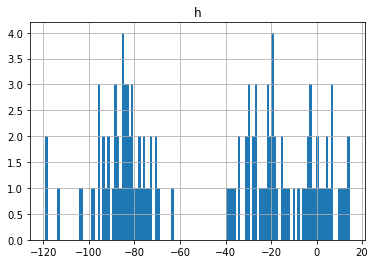

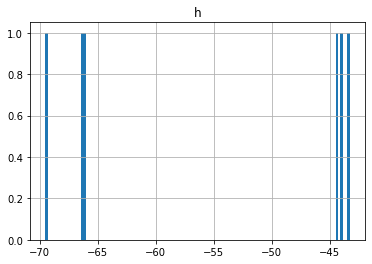

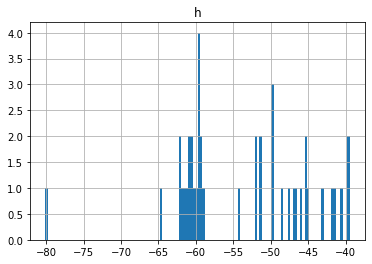

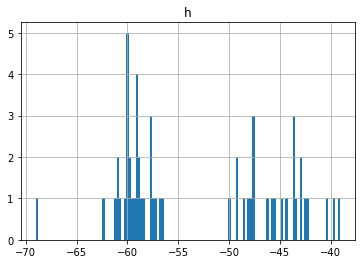

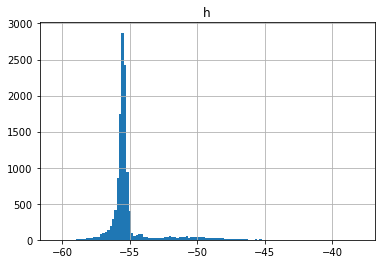

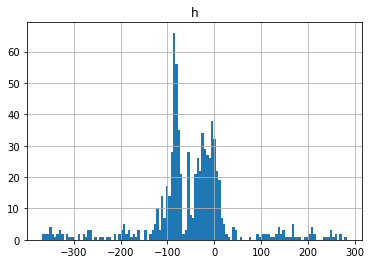

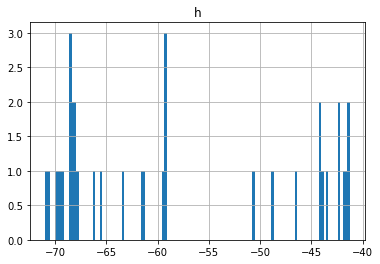

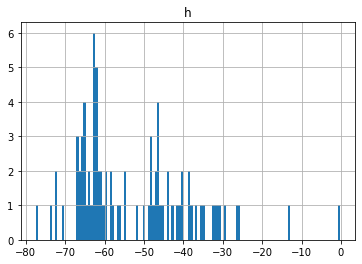

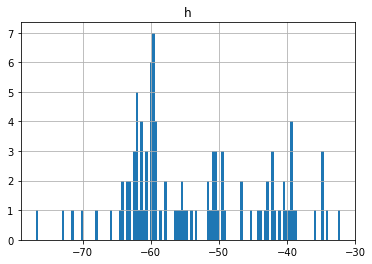

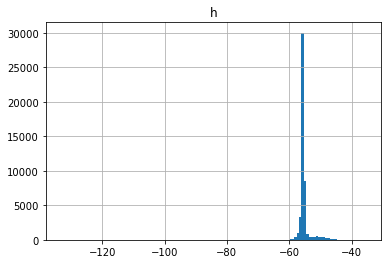

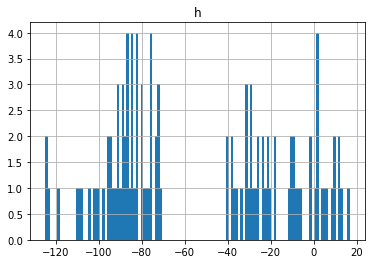

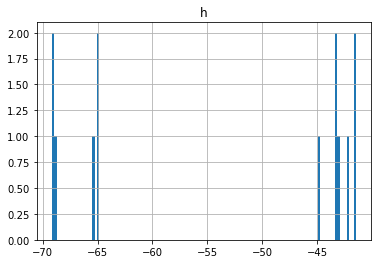

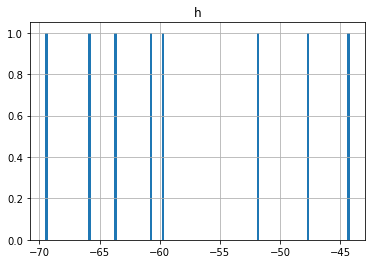

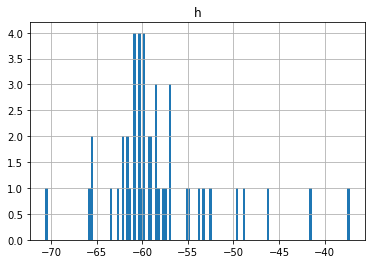

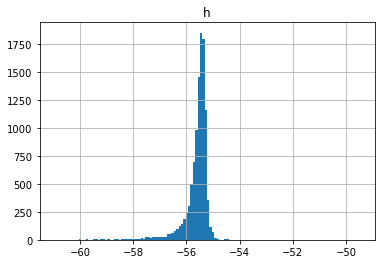

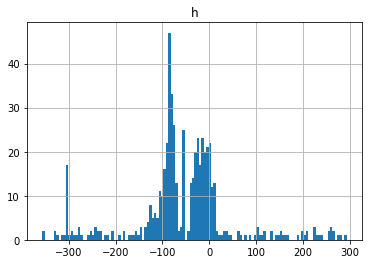

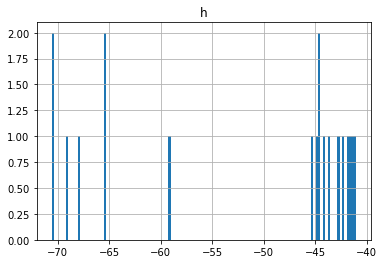

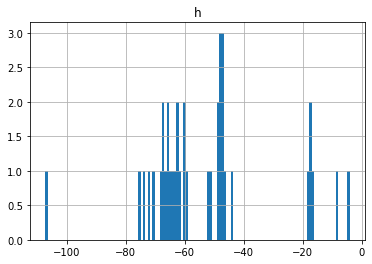

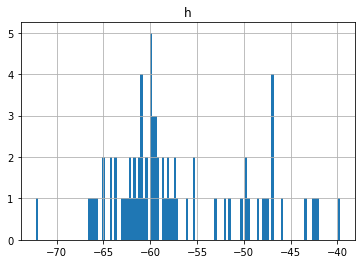

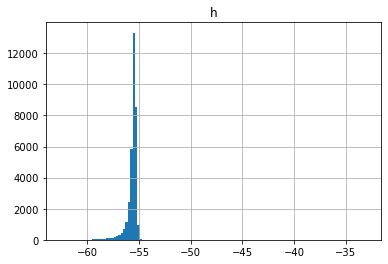

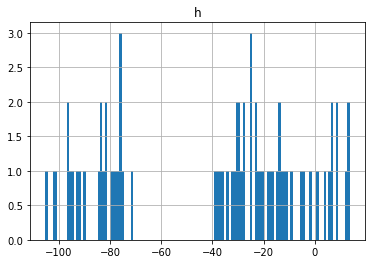

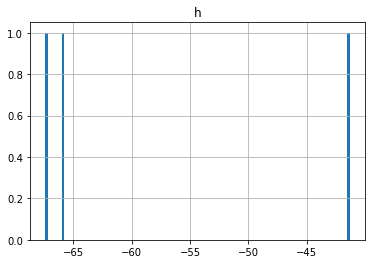

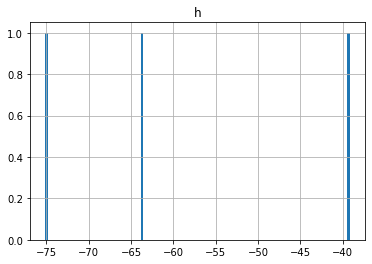

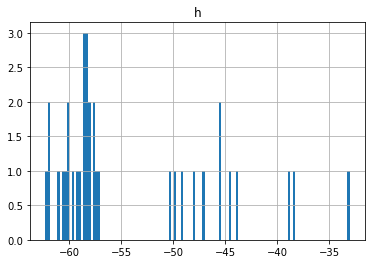

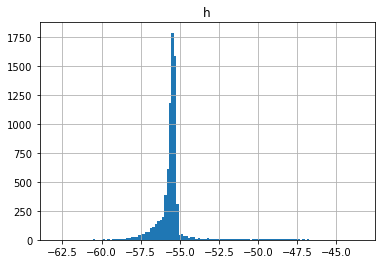

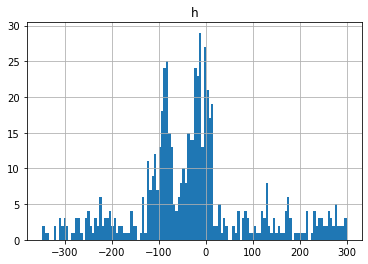

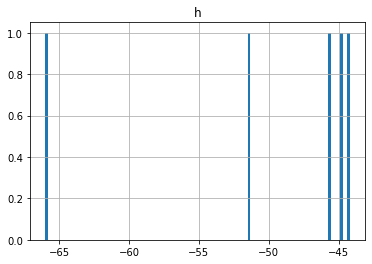

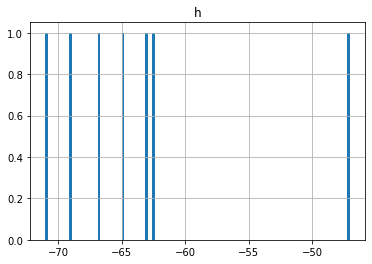

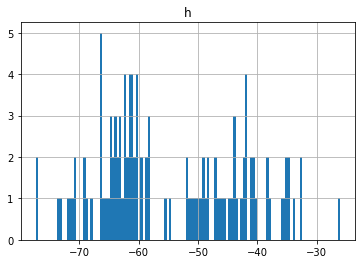

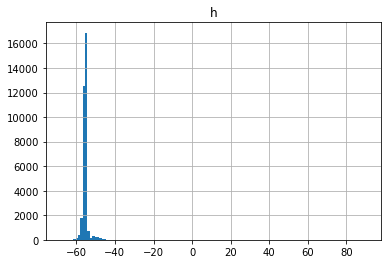

In [3]:
# Now we can get a histogram of the beam's elevation and their description
for df in df_beams:
    print(df.describe())
    df.hist('h', bins=128)